1.  What is hypothesis testing in statistics?

Hypothesis testing is a formal statistical procedure used to determine whether there is enough evidence in a sample of data to infer that a certain condition or hypothesis about a population holds true.

Framework: It involves setting up two opposing statements: the Null Hypothesis (H0) (which represents the status quo, often stating no effect or no difference) and the Alternative Hypothesis (Ha) (which represents the claim we are testing).

Goal: To use sample data to calculate a test statistic and a P-value, allowing us to decide whether to reject or fail to reject the null hypothesis.

Significance: It helps determine if observed differences or effects in data are statistically significant or simply due to random chance.

2. : What is the null hypothesis, and how does it differ from the alternative
hypothesis?

**Null Hypothesis (H0)**

Definition: The statement of "no effect," "no difference," or "no relationship." Represents the status quo.

Assumption: Assumed to be true until evidence proves otherwise.

Goal	We look for evidence to reject H0.

Example	H0 : The new drug has no effect on patient recovery time.

**Alternative Hypothesis (Ha)**

Definition: The statement that the researcher is trying to find evidence for; it contradicts the null hypothesis.

Assumption: Accepted only if the null hypothesis is rejected based on statistical evidence.

Goal: The research conclusion if H0 is rejected.

Exmaple: Ha: The new drug reduces patient recovery time.

3. Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.

The significance level (α), also known as the alpha level, is a critical threshold in hypothesis testing.

Definition: It is the maximum probability of rejecting the null hypothesis (H0) when it is actually true (committing a Type I error).

Common Values: Typically set at 0.05 (5%), 0.01 (1%), or 0.10 (10%).

Role in Decision Making:

The significance level directly determines the outcome by being compared against the P-value:

P-value ≤α: Reject H0. The result is deemed statistically significant because the observed data is very unlikely to have occurred if the null hypothesis were true.

P-value >α: Fail to Reject H0 . There is not enough statistical evidence to conclude that the null hypothesis is false.

4. What are Type I and Type II errors? Give examples of each.

Type I and Type II errors are the two primary mistakes that can be made during the hypothesis testing process.

1. Type I Error (α)
Definition: Rejecting the Null Hypothesis (H0 ) when it is actually true.

Analogy: A "false positive."

Maximum Probability: The probability of committing a Type I error is equal to the significance level (α).

Example: A medical test concludes a patient has a rare disease (Reject H0) when, in reality, they do not have it (H0 is true).

2. Type II Error (β)
Definition: Failing to Reject the Null Hypothesis (H0) when it is actually false.

Analogy: A "false negative."

Probability: The probability is denoted by β.

Example:A medical test concludes a patient does not have a disease (Fail to  Reject H0) when, in reality, they do have it (H0is false).

5. What is the difference between a Z-test and a T-test? Explain when to use
each.

**Z-Test**

Assumption: Requires the Population Standard Deviation (σ) to be known.

Distribution: Uses the Standard Normal (Z) Distribution.

When to Use: When σ is known.

When the sample size (n) is large (n≥30), regardless of whether σ is known (due to CLT).

**T-Test**

Assumption: Used when the Population Standard Deviation (σ) is unknown.

Distribution: Uses the Student's t-Distribution.

When to Use: When σ is unknown.

When the sample size (n) is small (n<30).

Key Feature: Its critical value depends on the degrees of freedom (n−1).

6. Write a Python program to generate a binomial distribution with n=10 and
p=0.5, then plot its histogram.


--- Binomial Distribution Analysis ---
Theoretical Mean (n*p): 5.00
Computed Sample Mean: 4.9684
Computed Sample Std Dev: 1.5707


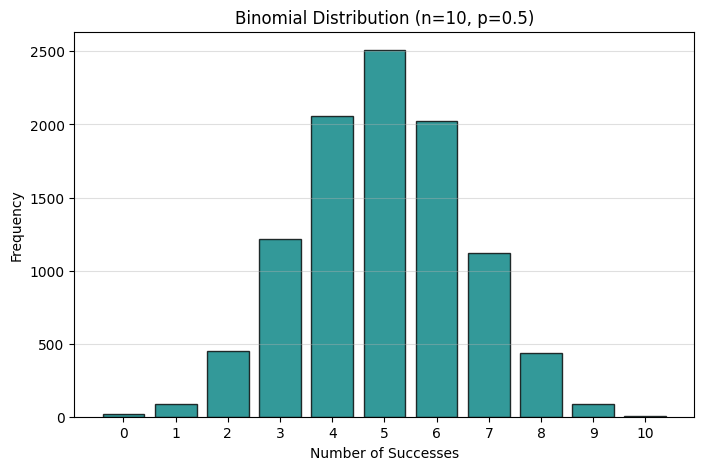

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Binomial Distribution
n_trials = 10  # Number of independent trials
p_success = 0.5  # Probability of success on each trial
n_samples = 10000 # Number of times to simulate the experiment

# 1. Generate random numbers from a Binomial Distribution
np.random.seed(42)  # for reproducibility
data = np.random.binomial(n=n_trials, p=p_success, size=n_samples)

# 2. Compute summary statistics
computed_mean = np.mean(data)
computed_std = np.std(data)

# 3. Draw a histogram
plt.figure(figsize=(8, 5))
# Use appropriate bins for discrete data
plt.hist(data, bins=np.arange(-0.5, n_trials + 1.5, 1), edgecolor='black', alpha=0.8, color='teal', rwidth=0.8)
plt.title(f'Binomial Distribution (n={n_trials}, p={p_success})')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, n_trials + 1, 1))
plt.grid(axis='y', alpha=0.4)
plt.savefig('binomial_distribution_histogram.png')

# 4. Print results
print("--- Binomial Distribution Analysis ---")
print(f"Theoretical Mean (n*p): {n_trials * p_success:.2f}")
print(f"Computed Sample Mean: {computed_mean:.4f}")
print(f"Computed Sample Std Dev: {computed_std:.4f}")

The resulting histogram is approximately symmetrical and centered around 5, which is the expected mean (μ=n⋅p=10⋅0.5=5). The computed sample statistics are very close to the theoretical values, confirming the correct simulation of the binomial distribution.

7. Implement hypothesis testing using Z-statistics for a sample dataset in
Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


In [2]:
import numpy as np
from scipy import stats
from math import sqrt

# Given sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Define Hypotheses and Parameters
population_mean_hypothesized = 50.0
population_std_known = 1.0 # Assumed for Z-test
alpha = 0.05

# Calculate Sample Statistics
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate the Z-Statistic
z_statistic = (sample_mean - population_mean_hypothesized) / (population_std_known / sqrt(sample_size))

# Calculate the P-value (Two-tailed test)
p_value = stats.norm.sf(abs(z_statistic)) * 2

# Calculate Critical Z-value
z_critical_upper = stats.norm.ppf(1 - alpha / 2)

# Make a Decision
if p_value <= alpha:
    decision = "Reject Null Hypothesis (H0)"
else:
    decision = "Fail to Reject Null Hypothesis (H0)"

# Print Results
print("--- Z-Test Hypothesis Testing Results ---")
print(f"H0: μ = {population_mean_hypothesized}")
print(f"Ha: μ ≠ {population_mean_hypothesized}")
print(f"Significance Level (α): {alpha}")
print("-" * 40)
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Calculated Z-Statistic: {z_statistic:.4f}")
print(f"P-value (Two-tailed): {p_value:.4f}")
print(f"Critical Z-Values (±): {z_critical_upper:.4f}")
print("-" * 40)
print(f"Decision at α={alpha}: {decision}")

--- Z-Test Hypothesis Testing Results ---
H0: μ = 50.0
Ha: μ ≠ 50.0
Significance Level (α): 0.05
----------------------------------------
Sample Mean: 50.0889
Calculated Z-Statistic: 0.5333
P-value (Two-tailed): 0.5938
Critical Z-Values (±): 1.9600
----------------------------------------
Decision at α=0.05: Fail to Reject Null Hypothesis (H0)


Interpretation of Results
Hypotheses: We tested if the true population mean (μ) is 50.0.

P-value: The calculated P-value is 0.5938.

Decision: Since the P-value (0.5938) is greater than the significance level (α=0.05), we Fail to Reject the Null Hypothesis (H0).

Conclusion: There is not enough statistical evidence to conclude that the true population mean is significantly different from 50.0. The observed difference between the sample mean (≈50.09) and the hypothesized mean (50.0) is likely due to random sampling variability.

8. Write a Python script to simulate data from a normal distribution and
calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


--- Confidence Interval Calculation ---
Sample Mean: 96.6179
Sample Standard Deviation: 14.0050
-----------------------------------
95% Confidence Interval: (92.6377, 100.5981)


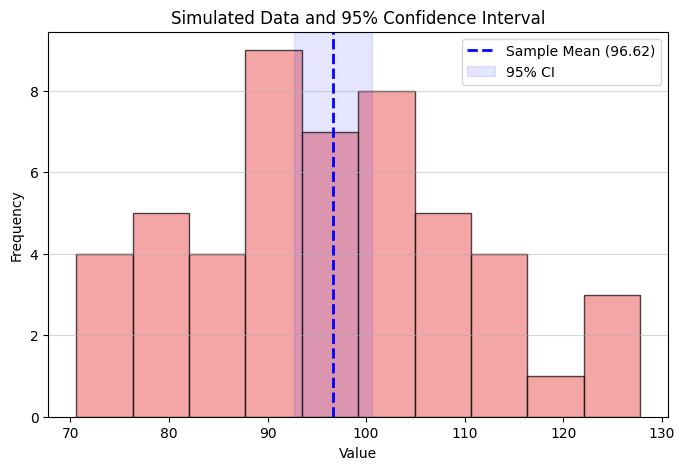

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Setup Parameters
mu = 100        # Population mean
sigma = 15      # Population standard deviation
n_samples = 50  # Sample size
confidence_level = 0.95

# 2. Simulate Data
np.random.seed(42) # for reproducibility
sample_data = np.random.normal(loc=mu, scale=sigma, size=n_samples)

# 3. Calculate Sample Statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
sample_size = len(sample_data)

# 4. Calculate 95% Confidence Interval (using T-test)
df = sample_size - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)
sem = sample_std / np.sqrt(sample_size)
margin_of_error = t_critical * sem
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# 5. Plot the Data
plt.figure(figsize=(8, 5))
plt.hist(sample_data, bins=10, edgecolor='black', alpha=0.7, color='lightcoral')
plt.axvline(sample_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Sample Mean ({sample_mean:.2f})')
plt.axvspan(ci_lower, ci_upper, color='blue', alpha=0.1, label='95% CI')
plt.title('Simulated Data and 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig('confidence_interval_plot.png')

# 6. Print Results
print("--- Confidence Interval Calculation ---")
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")
print("-" * 35)
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


The 95% confidence interval for the population mean (μ=100) based on this sample is (92.64, 100.60). Since the true population mean (100) falls within this calculated interval, this sample successfully captured the true parameter.

9. : Write a Python function to calculate the Z-scores from a dataset and
visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.


A Z-score (or standard score) measures how many standard deviations a particular data point is away from the mean of its distribution.

A positive Z-score indicates the data point is above the mean. For example, a Z-score of Z=+1.5 means the value is 1.5 standard deviations greater than the mean.

A negative Z-score indicates the data point is below the mean. For example, a Z-score of Z=-2.0 means the value is two standard deviations less than the mean.

The mean of the Z-scores of any dataset will be 0, and the standard deviation will be 1.

--- Z-Score Standardization Analysis ---
Raw Sample Mean: 96.6179
Raw Sample Std Dev: 13.8643
-----------------------------------
Standardized Mean (E[Z]): 0.0000
Standardized Std Dev (Std[Z]): 1.0000
Note: Mean should be 0 and Std Dev should be 1 after standardization.


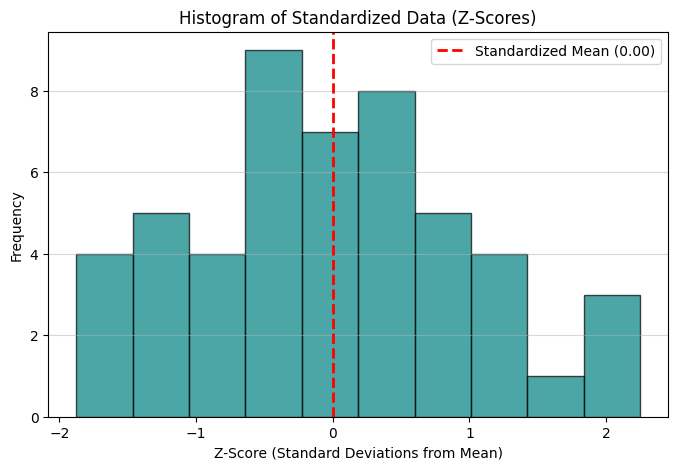

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate Z-scores
def calculate_z_scores(data):
    """Calculates the Z-scores for a given array of data."""
    data_mean = np.mean(data)
    data_std = np.std(data) # Use population std for z-score definition
    # Z-score formula: Z = (X - mu) / sigma
    z_scores = (data - data_mean) / data_std
    return z_scores

# 1. Setup Parameters
mu = 100        # Population mean (of raw data)
sigma = 15      # Population standard deviation (of raw data)
n_samples = 50  # Sample size

# 2. Simulate Data
np.random.seed(42) # for reproducibility
sample_data = np.random.normal(loc=mu, scale=sigma, size=n_samples)

# 3. Calculate Z-Scores
z_scores = calculate_z_scores(sample_data)

# 4. Compute Statistics for Standardized Data
z_mean = np.mean(z_scores)
z_std = np.std(z_scores)

# 5. Plot the Standardized Data (Z-Scores)
plt.figure(figsize=(8, 5))
# Plot histogram of Z-scores
plt.hist(z_scores, bins=10, edgecolor='black', alpha=0.7, color='teal')
plt.axvline(z_mean, color='red', linestyle='dashed', linewidth=2, label=f'Standardized Mean ({z_mean:.2f})')
plt.title('Histogram of Standardized Data (Z-Scores)')
plt.xlabel('Z-Score (Standard Deviations from Mean)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig('zscore_histogram_plot.png')

# 6. Print Results
print("--- Z-Score Standardization Analysis ---")
print(f"Raw Sample Mean: {np.mean(sample_data):.4f}")
print(f"Raw Sample Std Dev: {np.std(sample_data):.4f}")
print("-" * 35)
print(f"Standardized Mean (E[Z]): {z_mean:.4f}")
print(f"Standardized Std Dev (Std[Z]): {z_std:.4f}")
print("Note: Mean should be 0 and Std Dev should be 1 after standardization.")
